<a href="https://colab.research.google.com/github/The-DarK-os/deep-learning/blob/master/Tensorflow_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% tensorflow_version 1.3.0
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.3.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


In [7]:
hello = tf.constant("Hello ")
world = tf.constant("World")
print(type(hello))
print(hello)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("Const_6:0", shape=(), dtype=string)


In [10]:
with tf.Session() as sess:
    result = sess.run(hello + world)

print(result)

b'Hello World'


In [12]:
a = tf.constant(10)
b = tf.constant(20)

with tf.Session() as sess:
    result = sess.run(a + b)
print(result)

30


In [15]:
const = tf.constant(10)
fill_mat = tf.fill((4,4),10)
myzeros = tf.zeros((4,4))
myones = tf.ones((4,4))
myrandn = tf.random_normal((4,4),mean =0,stddev=1.0)
myrandu = tf.random_uniform((4,4),minval=1,maxval=100)

my_ops = [const,fill_mat,myzeros,myones,myrandn,myrandu]
sess = tf.InteractiveSession()
for op in my_ops:
  print(sess.run(op))
  print("\n")

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-0.45302796  0.85848945 -1.1082338  -0.2887798 ]
 [-1.0245456  -0.27341577  0.45189     1.0854291 ]
 [ 0.15609623 -0.20432745 -1.2996808  -0.9048146 ]
 [ 0.66795504  0.15826117 -2.1672642   0.5134738 ]]


[[87.928055 58.927845 76.26734  73.67315 ]
 [83.155785 45.729767 79.883995 33.69953 ]
 [92.669846 67.64877  33.962334 93.090225]
 [27.902645 98.1994   95.41814  99.32823 ]]




/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [19]:
a = tf.constant([ [1,2],
                 [3,4] ])
print(a.get_shape())

b = tf.constant( [ [10], [100] ])
print(b.get_shape())

result = tf.matmul(a,b)
sess.run(result)

(2, 2)
(2, 1)


array([[210],
       [430]], dtype=int32)

In [22]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1 + n2

with tf.Session() as sess:
  result = sess.run(n3)
print(result)

3


In [23]:
graph = tf.Graph()
print(graph)

In [31]:
graph_one = tf.get_default_graph()
graph_two = tf.Graph()

with graph_two.as_default():
    print(graph_two is tf.get_default_graph)
    print(graph_two)
    print(tf.get_default_graph)

False
<function get_default_graph at 0x7f4896360dd0>


In [34]:
sess = tf.InteractiveSession()
my_tensor = tf.random_uniform((4,4),0,1)
my_var = tf.Variable(initial_value=my_tensor)
init = tf.global_variables_initializer()
sess.run(init)
sess.run(my_var)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


array([[0.3230344 , 0.983562  , 0.4566493 , 0.8884711 ],
       [0.42615008, 0.00170052, 0.6235614 , 0.7010195 ],
       [0.508603  , 0.5990931 , 0.82462156, 0.36177182],
       [0.5954162 , 0.88702905, 0.33906662, 0.32853234]], dtype=float32)

In [36]:
ph = tf.placeholder(tf.float32,shape =(None,5))

## **Simple Regression**

In [37]:
import numpy as np
np.random.seed(101)
tf.set_random_seed(101)

In [40]:
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [43]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

add_op = a+b

mul_op = a*b

In [49]:
with tf.Session() as sess:
  add_result = sess.run(add_op,feed_dict = {a:rand_a,b:rand_b})
  mult_result = sess.run(mul_op , feed_dict = {a:rand_a,b:rand_b})

print(add_result)
print("\n")
print(mult_result)

[[ 88.98393   73.07097   25.255817  43.309807  78.43666 ]
 [ 78.03582  116.00413   79.79341   71.27329   83.820145]
 [ 97.19916  140.72107  147.88876  100.77908   99.07428 ]
 [138.58093  107.312836  86.60985   79.962135 138.6179  ]
 [ 90.60228   76.401726  74.55246   51.83258   75.03522 ]]


[[1423.7158   1090.8779     90.769165  468.38913  1203.1075  ]
 [ 794.7713   3300.393     910.75903   348.49557  1176.4932  ]
 [2342.8853   4647.908    5027.5254   2532.4866   2442.196   ]
 [4770.2383   2429.757     880.096     382.50137  4773.005   ]
 [ 761.555     628.4151    611.07697   398.0625    615.60315 ]]


In [50]:
n_features = 10
n_dense_neurons = 3

x = tf.placeholder(tf.float32,(None,n_features))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

xW = tf.matmul(x,W)
z = tf.add(xW,b)
a = tf.sigmoid(z)

In [53]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a,feed_dict = {x:np.random.random([1,n_features])})
print(layer_out)

[[0.55432075 0.7393118  0.30537763]]


In [55]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

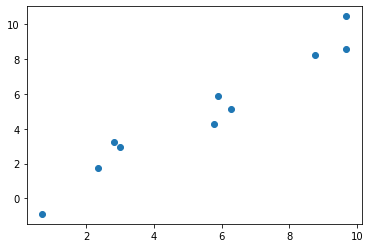

In [57]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_label,"o")

In [60]:
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))
error = 0
for x,y in zip(x_data,y_label):
  y_hat = m*x + b
  error += (y-y_hat)**2

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [65]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  training_steps = 1000
  for i in range(training_steps):
    sess.run(train)
  final_slope , final_intercept = sess.run([m,b])

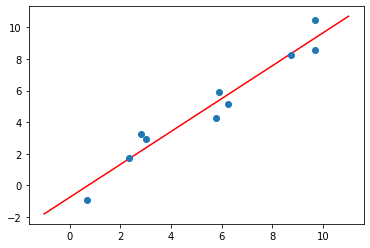

In [66]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope * x_test + final_intercept
plt.plot(x_test,y_pred_plot,"r")
plt.plot(x_data,y_label,"o")